# Israel Weather Forecast 

This program is small program written in python and makes api call to 7timer.
The program shows weekly weather forecast of 5 cities in Israel, including temperatures graph.


Choose city which you want to find it weather forcast: 
Jerusalem, Tel Aviv, Haifa, Beer Sheva, Eilat and Rehovot
Haifa
08/09/20
Max temperature during this day: 29
Min temperature during this day: 26

09/09/20
Max temperature during this day: 29
Min temperature during this day: 26

10/09/20
Max temperature during this day: 29
Min temperature during this day: 26

11/09/20
Max temperature during this day: 29
Min temperature during this day: 26

12/09/20
Max temperature during this day: 28
Min temperature during this day: 26

13/09/20
Max temperature during this day: 29
Min temperature during this day: 26

14/09/20
Max temperature during this day: 27
Min temperature during this day: 25



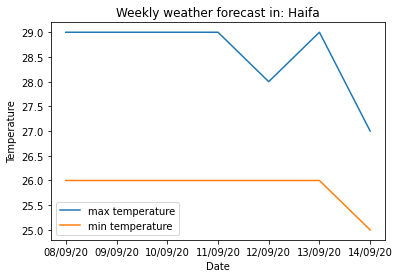

In [3]:
import requests
import matplotlib.pyplot as plt
import numpy as np

# "This function write the output text with user selection and answer from API call"
def write_to_output(dict, city):
    f = open("output.txt", "w")
    f.write("user selection is: " + city + '\n')
    f.write("the weekly weather fore cast, from API call, in Json format: " + str(dict['dataseries']) + '\n')
    f.close()

# "This function is the main function of the program"
def show_city_forecast(city):
    url = 'http://www.7timer.info/bin/api.pl?lon={0}/&lat={1}&product=civillight&output=json'
    url = load_lat_long_from_file(city, url)
    dict=requests.get(url).json()
    write_to_output(dict, city)
    listOfDays = dict['dataseries']
    x = []
    minLine = []
    maxLine = []
    count = 0
    for obj in listOfDays:
        tempMax = obj['temp2m']['max']
        tempMin = obj['temp2m']['min']
        # "convert the date to be readable"
        date = str(obj['date'])
        day = date[6:8]
        month = date[4:6]
        year = date[2:4]
        formattedDate = day + '/' + month + '/' + year
        # "store values for the graph"
        x.insert(count, formattedDate)
        minLine.insert(count, tempMin)
        maxLine.insert(count, tempMax)
        # "print the alphabetic answer"
        print(formattedDate)
        print('Max temperature during this day: ' + str(tempMax))
        print('Min temperature during this day: ' + str(tempMin) + '\n')
        count = count+1

    print_graph(city, maxLine, minLine, x)

# "function printing the weekly temperature forecast graph"
def print_graph(city, maxLine, minLine, x):
    plt.plot()
    plt.plot(x, np.array(maxLine), label="max temperature")
    plt.plot(x, np.array(minLine), label="min temperature")
    plt.xlabel('Date')
    plt.ylabel('Temperature')
    plt.title('Weekly weather forecast in: ' + city)
    plt.legend()
    plt.show()

# "function loads lat and long values from config file"
def load_lat_long_from_file(city, url):
    path = 'cities.txt'
    file = open(path)
    line = file.readline()
    while city.lower() not in line:
        line = file.readline()
    # "extract the values from file
    lat_num = line[line.find('lat=')+4:line.find('lat=') + 9]
    long_num = line[line.rfind('long=')+5:line.rfind('long=') + 10]
    return url.format(long_num, lat_num)



cities = ["jerusalem","tel aviv","haifa","beer sheva","eilat","rehovot"]
val = input(
    "Choose city which you want to find it weather forcast: "+'\n' + "Jerusalem, Tel Aviv, Haifa, Beer Sheva, Eilat and Rehovot" +'\n')
while val.lower() not in cities:
    val = input("Invalid city name, please insert your choice again (exact value) ")
show_city_forecast(val)
